In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sal = pd.read_csv('Salary_Data.csv')

In [3]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
sal.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [6]:
sal.isna().any()

YearsExperience    False
Salary             False
dtype: bool

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

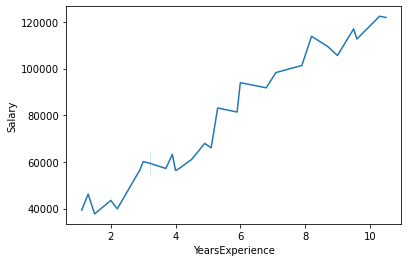

In [7]:
sns.lineplot(sal['YearsExperience'],sal['Salary'])

Here, the salary increases with respect to Experience

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

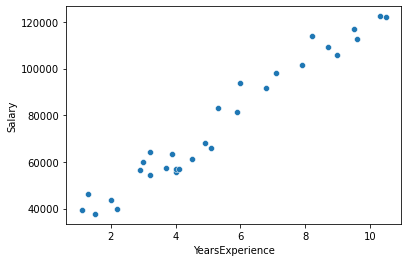

In [8]:
sns.scatterplot(sal['YearsExperience'],sal['Salary'])

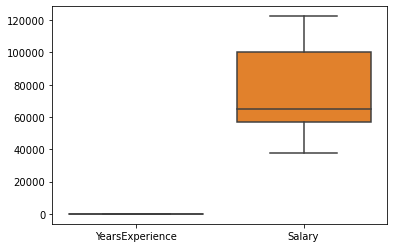

In [9]:
sns.boxplot(data = sal)
plt.show()

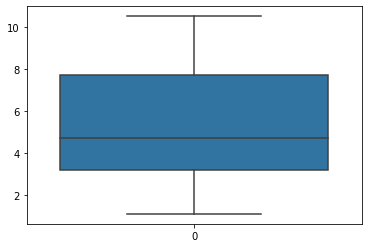

In [10]:
sns.boxplot(data = sal['YearsExperience'])
plt.show()

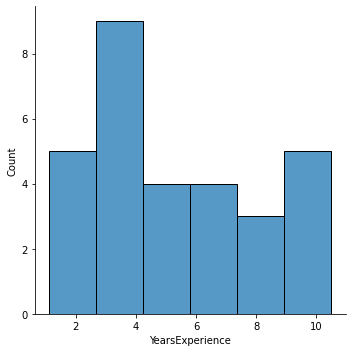

In [11]:
sns.displot(data=sal, x="YearsExperience")

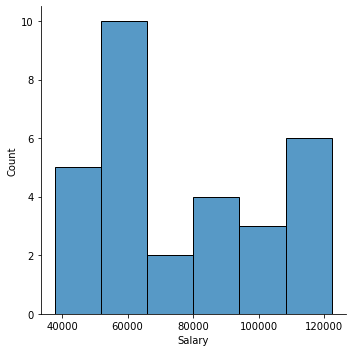

In [12]:
sns.displot(data=sal, x="Salary")

<AxesSubplot:>

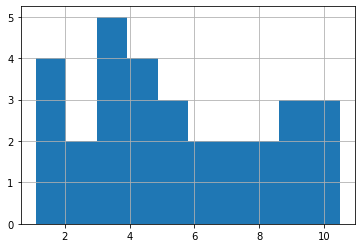

In [13]:
sal['YearsExperience'].hist()

<AxesSubplot:>

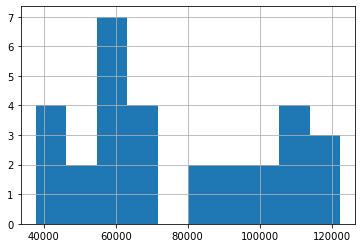

In [14]:
sal['Salary'].hist()

In [15]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

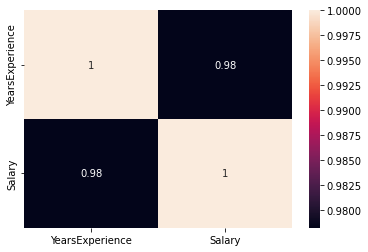

In [16]:
sns.heatmap(sal.corr(),annot=True)

In [17]:
X = sal.iloc[:,:-1].values 
Y = sal.iloc[:,1].values

In [18]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [19]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [35]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=sal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        13:51:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SPLITTING THE DATA SET INTO TRAINING SET AND TEST SET

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [21]:
X_train

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [22]:
Y_train

array([112635.,  55794.,  83088., 101302.,  56642.,  66029.,  64445.,
        61111., 113812.,  91738.,  46205., 121872.,  60150.,  39891.,
        81363.,  93940.,  57189.,  54445., 105582.,  43525.,  39343.,
        98273.,  67938.,  56957.])

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
model.intercept_

26780.099150628186

In [26]:
model.coef_

array([9312.57512673])

In [27]:
Y_pred = model.predict(X_test)

In [28]:
Y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [29]:
from sklearn.metrics import r2_score

In [30]:
score = r2_score(Y_test,Y_pred)

In [31]:
score

0.988169515729126

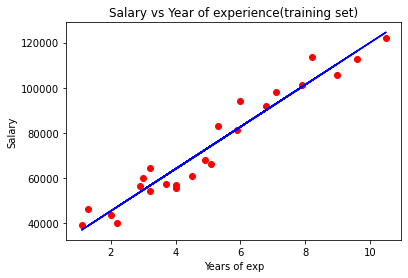

In [32]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,model.predict(X_train),color = 'blue')
plt.title('Salary vs Year of experience(training set)')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()

In [ ]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_train,model.predict(X_train),color = 'blue')# no need to give the X_test,y_pred values
plt.title('Salary vs Year of experience(testing set)')
plt.xlabel('Years of exp')
plt.ylabel('Salary')
plt.show()